In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, roc_curve, precision_recall_curve, auc, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
df.head()
len(df)

1025

In [4]:
# 특성(features)과 타겟(target) 분리
X = df.drop('target', axis=1)
y = df['target']

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# DecisionTreeClassifier 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터로 예측 (확률 값 얻기)
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)



In [5]:
# 정확도 평가 (선택 사항)
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도: {accuracy:.2f}")

# Precision, Recall, F1 Score 계산
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"정밀도 (Precision): {precision:.2f}")
print(f"재현율 (Recall): {recall:.2f}")
print(f"F1 스코어: {f1:.2f}")

# Specificity 계산 (TN / (TN + FP))
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"특이도 (Specificity): {specificity:.2f}")


# ROC 곡선 및 AUC 계산
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.2f}")

# PR 곡선 및 AUC 계산
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.2f}")

정확도: 0.98
정밀도 (Precision): 1.00
재현율 (Recall): 0.96
F1 스코어: 0.98
특이도 (Specificity): 1.00
ROC AUC: 0.98
PR AUC: 0.99


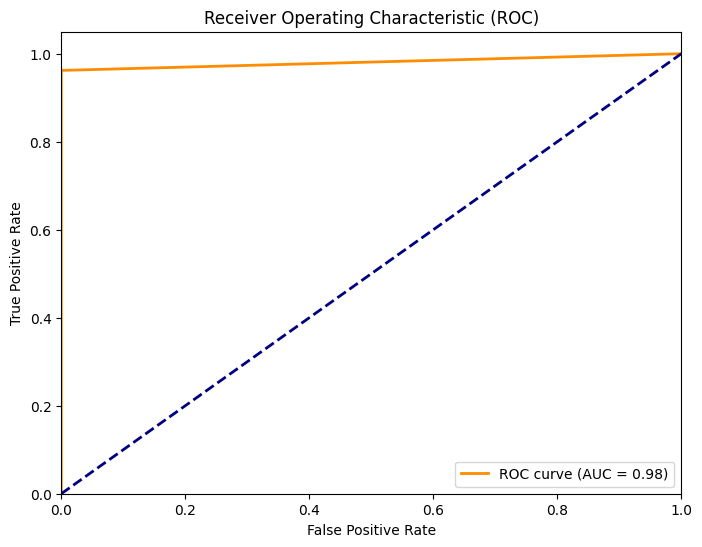

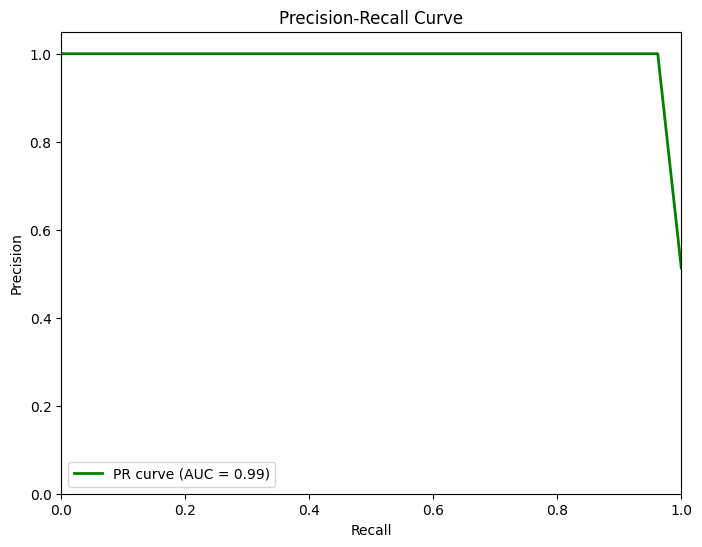

결정 트리 시각화..... 각 노드의 분기 기준을 표시


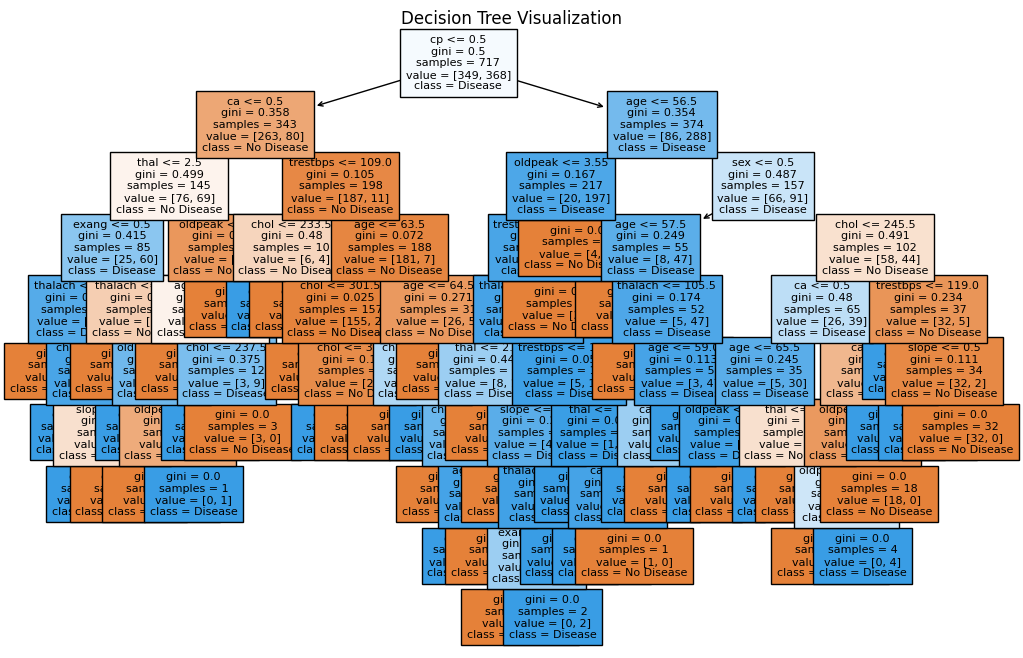

In [6]:
# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# PR 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# 결정 트리 시각화 (branch 확인)
print("결정 트리 시각화..... 각 노드의 분기 기준을 표시")
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()